In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.ensemble import VotingRegressor, BaggingRegressor

from sklearn.metrics import r2_score
import pickle

In [62]:
data = pd.read_csv("House Data.csv")

# Data Understanding

In [63]:
data.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road


In [64]:
data.shape

(13320, 9)

In [65]:
data.sample(5)

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
5920,Super built-up Area,Ready To Move,3 BHK,PrdgeSo,2582,5.0,2.0,250.00,Navi Peth
344,Super built-up Area,21-Dec,1 BHK,PrarePa,525,NaN,NaN,21.53,Model colony
89,Plot Area,Ready To Move,6 Bedroom,NaN,710,6.0,3.0,160.00,Viman Nagar
8854,Super built-up Area,Ready To Move,2 BHK,NaN,708,2.0,1.0,32.00,Dhole Patil Road
8053,Super built-up Area,Ready To Move,2 BHK,SLnssPr,1155,2.0,2.0,40.43,Swargate


In [66]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  object 
 1   availability   13320 non-null  object 
 2   size           13304 non-null  object 
 3   society        7818 non-null   object 
 4   total_sqft     13320 non-null  object 
 5   bath           13247 non-null  float64
 6   balcony        12711 non-null  float64
 7   price          13320 non-null  float64
 8   site_location  13319 non-null  object 
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [68]:
data.isnull().mean()*100

area_type         0.000000
availability      0.000000
size              0.120120
society          41.306306
total_sqft        0.000000
bath              0.548048
balcony           4.572072
price             0.000000
site_location     0.007508
dtype: float64

In [69]:
data.duplicated().sum()

11

In [70]:
data.drop_duplicates(inplace=True)

In [71]:
data = data.reset_index(drop=True)

# Data Cleaning

In [72]:
data = data.drop(columns=["area_type","society","availability"])

In [73]:
data.dropna(inplace=True)

In [74]:
data.shape

(12699, 6)

In [75]:
data.describe()

,bath,balcony,price
count,12699.000000,12699.000000,12699.000000
mean,2.617293,1.584613,106.093557
std,1.225999,0.817292,131.807038
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,49.090000
50%,2.000000,2.000000,70.000000
75%,3.000000,2.000000,115.000000
max,40.000000,3.000000,2912.000000


In [76]:
data.head()

,size,total_sqft,bath,balcony,price,site_location
0,2 BHK,1056,2.0,1.0,39.07,Alandi Road
1,4 Bedroom,2600,5.0,3.0,120.00,Ambegaon Budruk
2,3 BHK,1440,2.0,3.0,62.00,Anandnagar
3,3 BHK,1521,3.0,1.0,95.00,Aundh
4,2 BHK,1200,2.0,1.0,51.00,Aundh Road


In [77]:
data["size"].value_counts()

2 BHK         5146
3 BHK         4126
4 Bedroom      749
1 BHK          530
3 Bedroom      527
4 BHK          487
2 Bedroom      327
5 Bedroom      263
6 Bedroom      169
1 Bedroom      105
7 Bedroom       69
8 Bedroom       65
5 BHK           36
9 Bedroom       29
6 BHK           23
7 BHK           16
1 RK            13
9 BHK            5
8 BHK            3
10 Bedroom       3
11 Bedroom       2
11 BHK           1
27 BHK           1
43 Bedroom       1
14 BHK           1
12 Bedroom       1
13 BHK           1
Name: size, dtype: int64

In [78]:
data["size"] = data["size"].str.split(" ").str.get(0).astype(int)

In [79]:
data["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [80]:
data["total_sqft"] = data["total_sqft"].str.split(" ").str.get(0)
data = data[data["total_sqft"].str.isnumeric()]
data["total_sqft"] = data["total_sqft"].astype(int)

In [81]:
data["total_sqft"].unique()

array([1056, 2600, 1440, ..., 2758,  774, 4689])

In [82]:
data["bath"].unique()

array([ 2.,  5.,  3.,  4.,  1.,  8.,  7.,  6.,  9., 27., 11., 12., 10.,
       40., 15., 13.])

In [83]:
data["bath"] = data["bath"].astype(int)

In [84]:
data["balcony"].unique()

array([1., 3., 2., 0.])

In [85]:
data["balcony"] = data["balcony"].astype(int)

In [86]:
data["site_location"].unique()

array(['Alandi Road', 'Ambegaon Budruk', 'Anandnagar', 'Aundh',
       'Aundh Road', 'Balaji Nagar', 'Bhandarkar Road', 'Bibvewadi',
       'Bopodi', 'Budhwar Peth', 'Bund Garden Road', 'Camp',
       'Chandan Nagar', 'Dapodi', 'Deccan Gymkhana', 'Dehu Road',
       'Dhankawadi', 'Dhayari Phata', 'Dhole Patil Road', 'Erandwane',
       'Fatima Nagar', 'Fergusson College Road', 'Ganesh Peth',
       'Ganeshkhind', 'Ghorpade Peth', 'other', 'Gokhale Nagar',
       'Gultekdi', 'Guruwar peth', 'Hadapsar',
       'Hadapsar Industrial Estate', 'Jangali Maharaj Road',
       'Kalyani Nagar', 'Karve Nagar', 'Karve Road', 'Kasba Peth',
       'Khadaki', 'Khadki', 'Kharadi', 'Kondhwa Khurd', 'Koregaon Park',
       'Kothrud', 'Law College Road', 'Laxmi Road', 'Lulla Nagar',
       'Mahatma Gandhi Road', 'Mangalwar peth', 'Manik Bagh',
       'Market yard', 'Mukund Nagar', 'Mundhawa', 'Nagar Road',
       'Nana Peth', 'Narayan Peth', 'Narayangaon', 'Navi Peth',
       'Padmavati', 'Parvati Darsha

In [87]:
data = data[data["site_location"] != "other"]
data["site_location"] = data["site_location"].str.split(" ").str.slice(0,2).str.join(" ")

In [88]:
data["price"].unique()

array([ 39.07, 120.  ,  62.  , ...,  40.14, 231.  , 488.  ])

In [89]:
data["price"] = data["price"]*100000
data["price"] = data["price"].astype(int)

In [90]:
data.head()

,size,total_sqft,bath,balcony,price,site_location
0,2,1056,2,1,3907000,Alandi Road
1,4,2600,5,3,12000000,Ambegaon Budruk
2,3,1440,2,3,6200000,Anandnagar
3,3,1521,3,1,9500000,Aundh
4,2,1200,2,1,5100000,Aundh Road


In [91]:
data.describe()

,size,total_sqft,bath,balcony,price
count,12567.000000,12567.000000,12567.000000,12567.000000,1.256700e+04
mean,2.735816,1509.387523,2.613909,1.586536,1.057467e+07
std,1.205421,1164.476226,1.225060,0.817194,1.319194e+07
min,1.000000,5.000000,1.000000,0.000000,8.000000e+05
25%,2.000000,1100.000000,2.000000,1.000000,4.900000e+06
50%,3.000000,1258.000000,2.000000,2.000000,7.000000e+06
75%,3.000000,1636.000000,3.000000,2.000000,1.150000e+07
max,43.000000,52272.000000,40.000000,3.000000,2.912000e+08


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12567 entries, 0 to 13308
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   size           12567 non-null  int32 
 1   total_sqft     12567 non-null  int32 
 2   bath           12567 non-null  int32 
 3   balcony        12567 non-null  int32 
 4   price          12567 non-null  int32 
 5   site_location  12567 non-null  object
dtypes: int32(5), object(1)
memory usage: 441.8+ KB


In [93]:
data.duplicated().sum()

23

In [94]:
data.drop_duplicates(inplace=True)

In [95]:
data.shape

(12544, 6)

In [96]:
data.head()

,size,total_sqft,bath,balcony,price,site_location
0,2,1056,2,1,3907000,Alandi Road
1,4,2600,5,3,12000000,Ambegaon Budruk
2,3,1440,2,3,6200000,Anandnagar
3,3,1521,3,1,9500000,Aundh
4,2,1200,2,1,5100000,Aundh Road


In [143]:
data.to_csv("Cleaned_House_Details.csv")

# Exploratory Data Analysis

Univariant Analysis

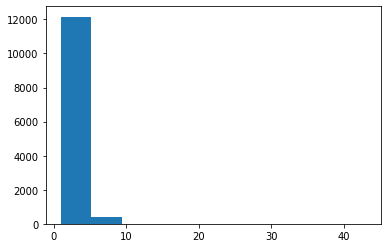

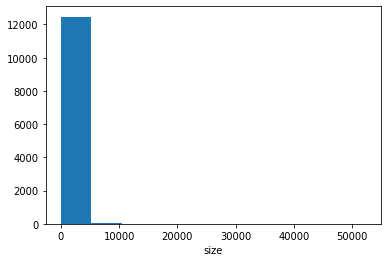

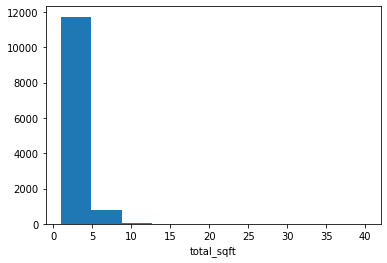

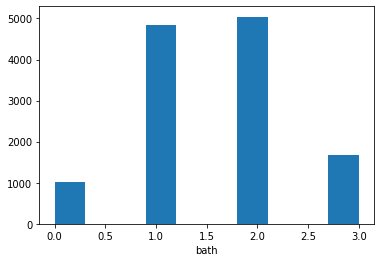

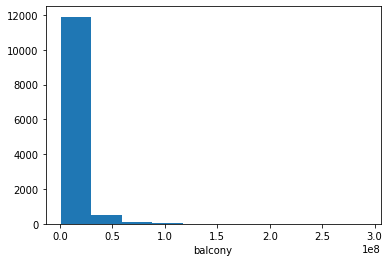

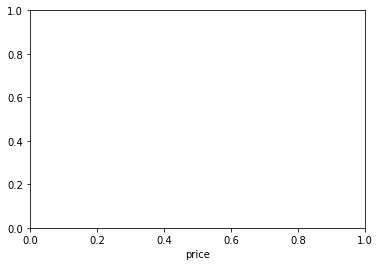

In [100]:
# Histogram
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int32" or data[data.columns[i]].dtypes == "float64":
        plt.show(plt.hist(data[data.columns[i]]))
        plt.xlabel(data.columns[i])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


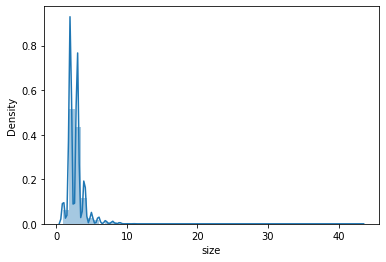

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


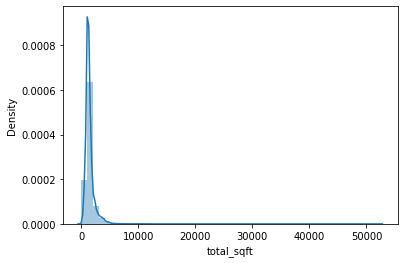

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


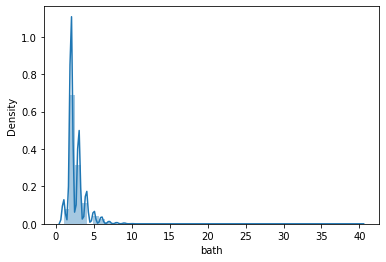

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


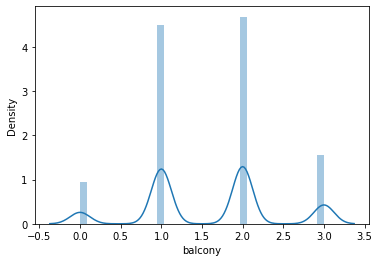

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


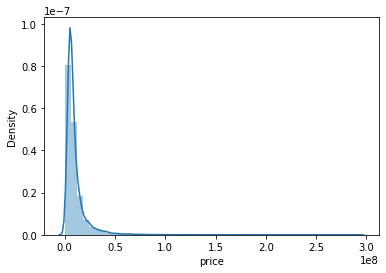

In [101]:
# Distplot
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int32" or data[data.columns[i]].dtypes == "float64":
        plt.show(sns.distplot(data[data.columns[i]]))
        #plt.xlabel(train.columns[i])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


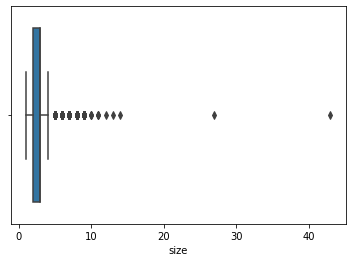

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


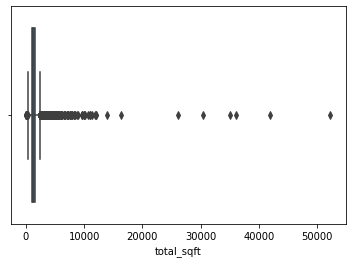

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


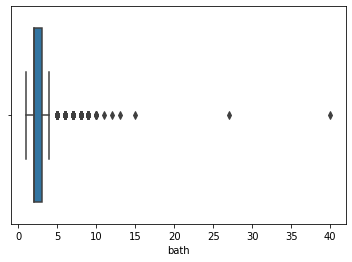

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


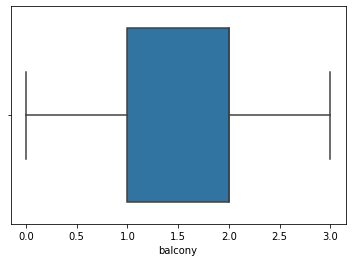

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


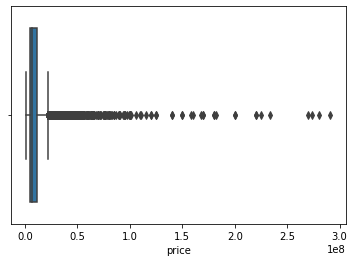

In [103]:
# BoxPlot
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int32" or data[data.columns[i]].dtypes == "float64":
        plt.show(sns.boxplot(data[data.columns[i]]))
        #plt.xlabel(train.columns[i])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


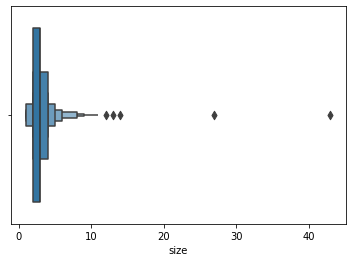

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


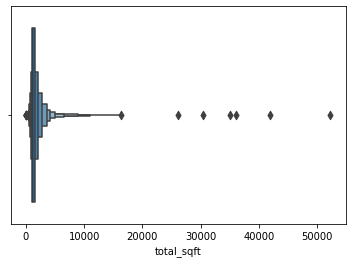

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


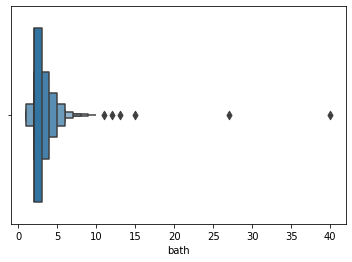

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


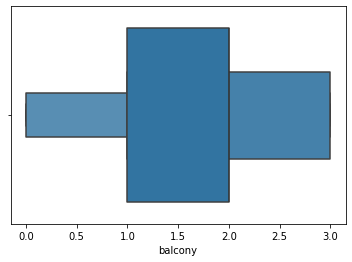

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


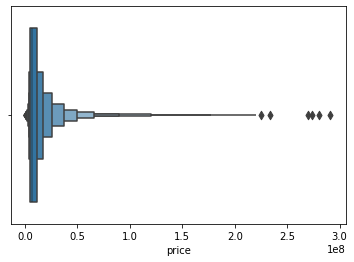

In [104]:
# BoxenPlot
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int32" or data[data.columns[i]].dtypes == "float64":
        plt.show(sns.boxenplot(data[data.columns[i]]))
        #plt.xlabel(train.columns[i])

Multivariant Analysis

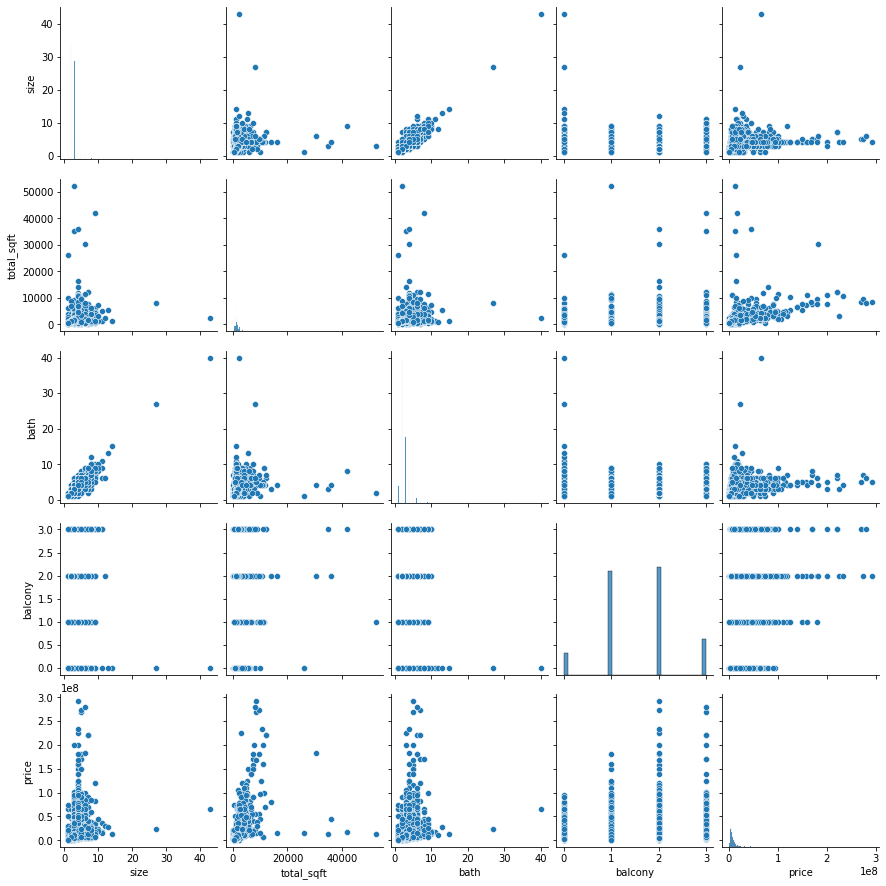

In [105]:
sns.pairplot(data)

In [106]:
data.shape

(12544, 6)

# Feature Transformation

Outlier Detection

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


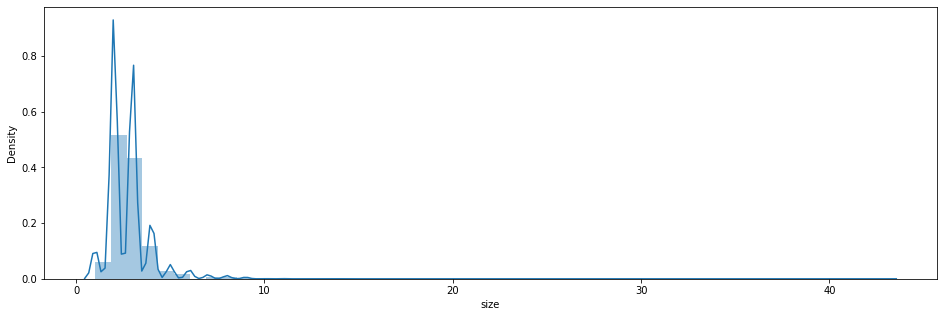

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


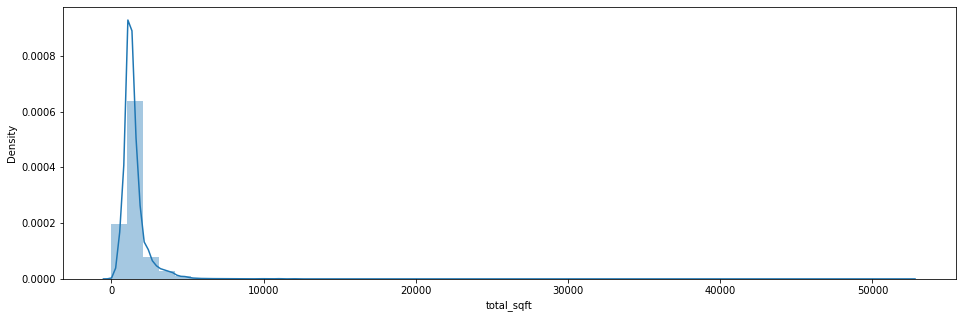

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


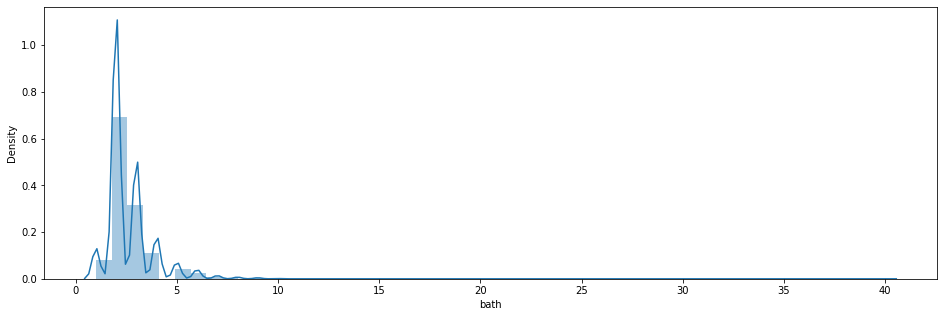

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


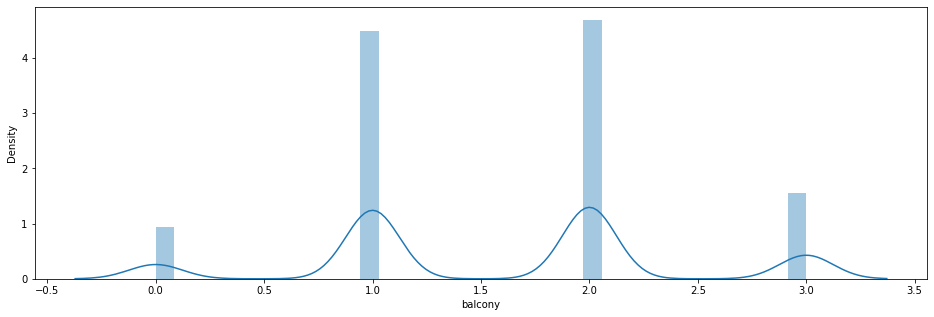

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


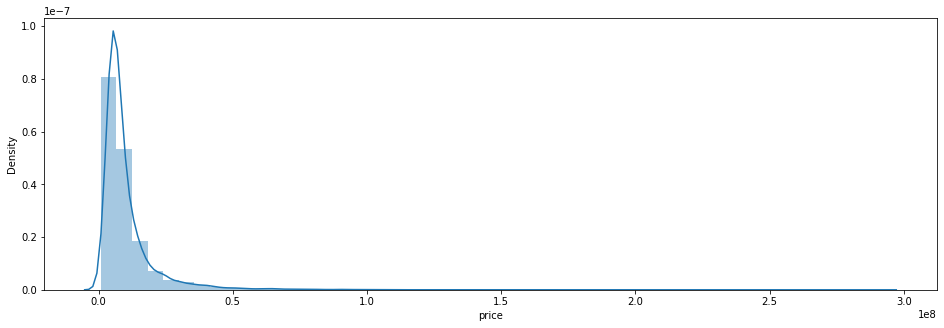

In [107]:
# Distplot
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int32" or data[data.columns[i]].dtypes == "float64":
        plt.figure(figsize=(16,5))
        sns.distplot(data[data.columns[i]])
        plt.show()

In [108]:
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int32" or data[data.columns[i]].dtypes == "float64":
        print(f'{data.columns[i]} : {data[data.columns[i]].skew()}')

size : 5.327247652389566
total_sqft : 17.542997352292225
bath : 4.6318376715996346
balcony : 0.007174596194668463
price : 7.915125488677364


C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


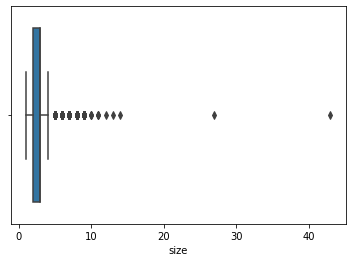

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


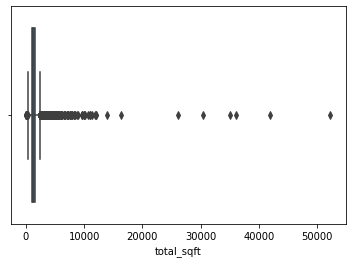

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


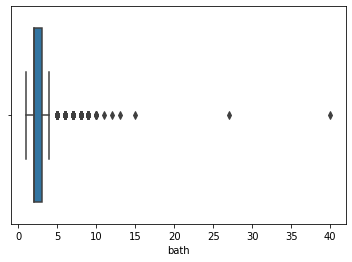

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


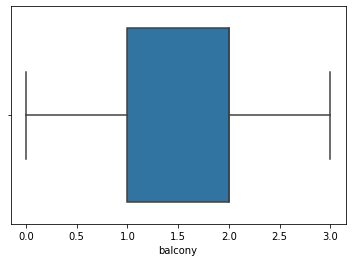

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


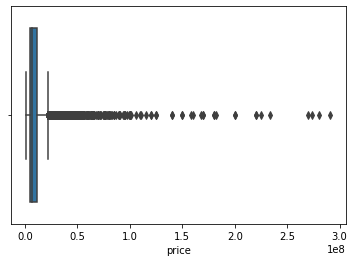

In [109]:
# Boxplot
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int32" or data[data.columns[i]].dtypes == "float64":
        plt.show(sns.boxplot(data[data.columns[i]]))
        #plt.xlabel(train.columns[i])

In [110]:
# CAPPING OUTLIERS

# percentile25 = train["colnames"].quantile(0.25)
# percentile75 = train["colnames"].quantile(0.75)
# iqr = percentile75 - percentile25
# upper_limit = percentile75 + 1.5 * iqr
# lower_limit = percentile25 - 1.5 * iqr

def outlier_removal(column_name):
    upper_limit, lower_limit = column_name.quantile(0.75) + 1.5 * (column_name.quantile(0.75) - column_name.quantile(0.25)), column_name.quantile(0.75) - 1.5 * (column_name.quantile(0.75) - column_name.quantile(0.25))
    
    column_name = np.where(column_name > upper_limit,upper_limit,
                                              np.where(column_name < lower_limit,lower_limit,
                                              column_name))
    return column_name

In [111]:
data["size"] = outlier_removal(data["size"])
data["total_sqft"] = outlier_removal(data["total_sqft"])
data["bath"] = outlier_removal(data["bath"])
data["price"] = outlier_removal(data["price"])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


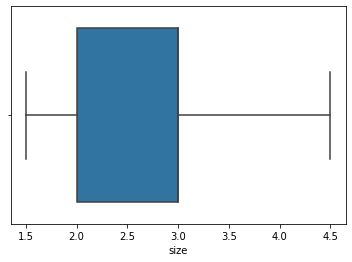

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


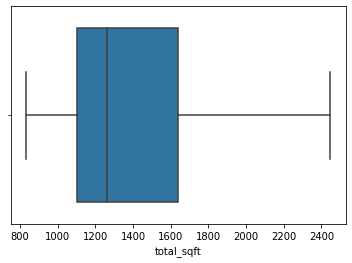

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


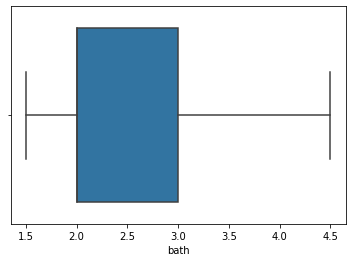

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


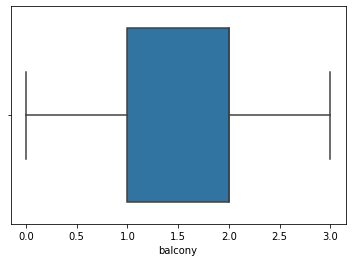

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


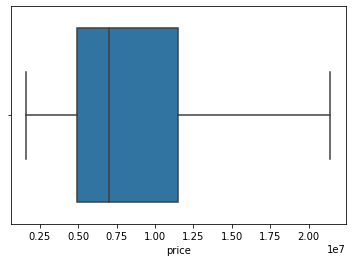

In [112]:
# Boxplot
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int32" or data[data.columns[i]].dtypes == "float64":
        plt.show(sns.boxplot(data[data.columns[i]]))
        #plt.xlabel(train.columns[i])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


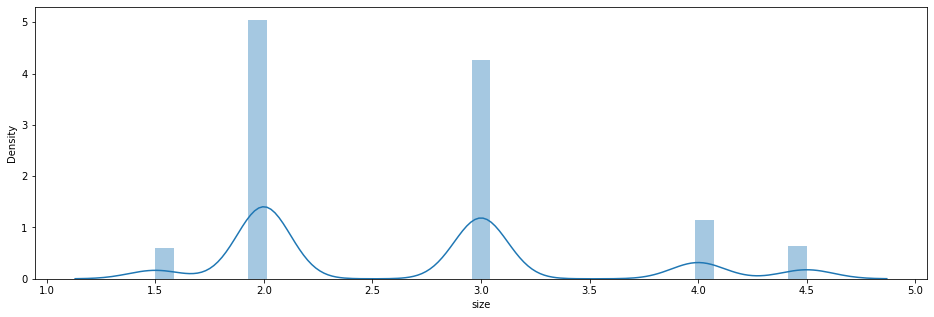

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


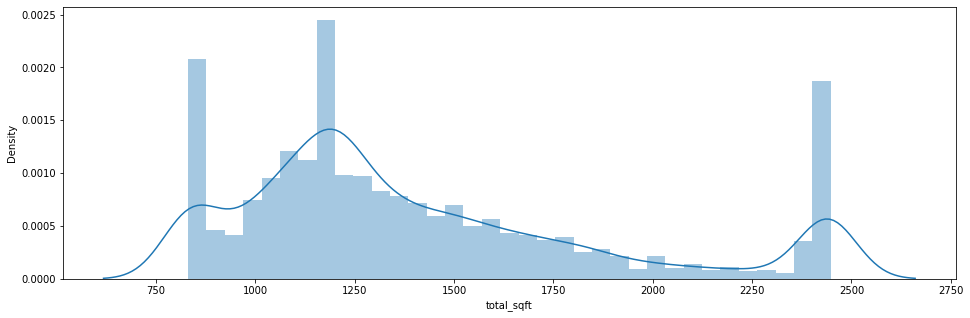

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


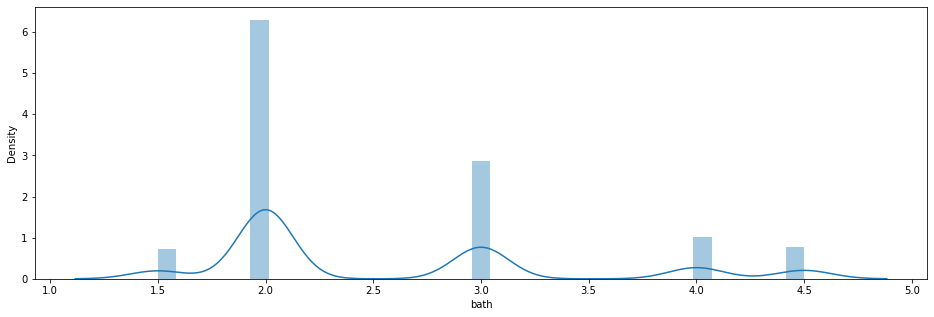

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


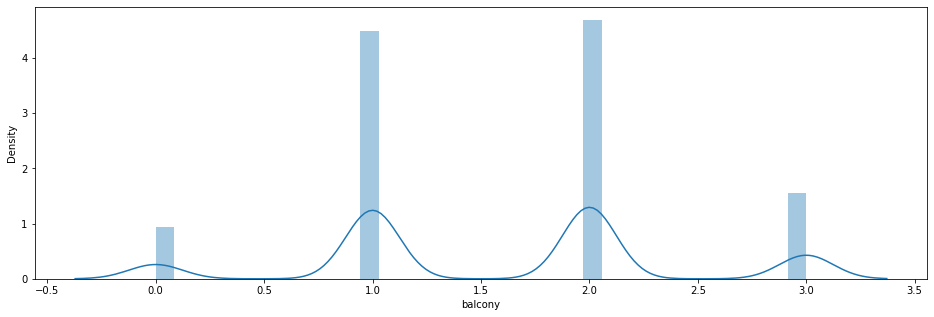

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


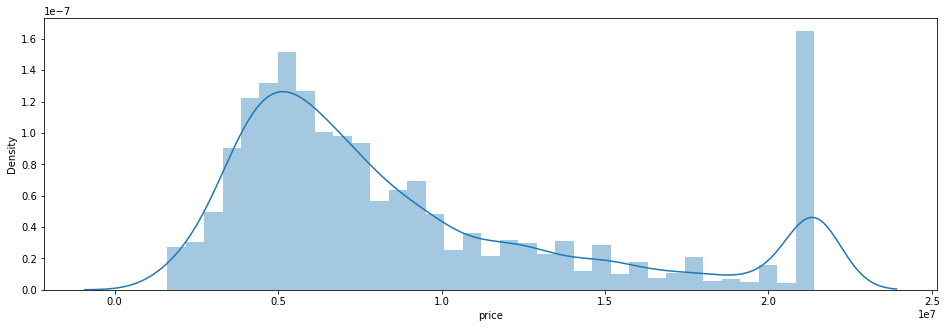

In [113]:
# Distplot
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int32" or data[data.columns[i]].dtypes == "float64":
        plt.figure(figsize=(16,5))
        sns.distplot(data[data.columns[i]])
        plt.show()

In [114]:
data.shape

(12544, 6)

In [115]:
data.shape

(12544, 6)

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12544 entries, 0 to 13308
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   size           12544 non-null  float64
 1   total_sqft     12544 non-null  float64
 2   bath           12544 non-null  float64
 3   balcony        12544 non-null  int32  
 4   price          12544 non-null  float64
 5   site_location  12544 non-null  object 
dtypes: float64(4), int32(1), object(1)
memory usage: 895.0+ KB


In [117]:
data.head()

,size,total_sqft,bath,balcony,price,site_location
0,2.0,1056.0,2.0,1,3907000.0,Alandi Road
1,4.0,2447.5,4.5,3,12000000.0,Ambegaon Budruk
2,3.0,1440.0,2.0,3,6200000.0,Anandnagar
3,3.0,1521.0,3.0,1,9500000.0,Aundh
4,2.0,1200.0,2.0,1,5100000.0,Aundh Road


Handling Categorical Features 

Feature Scaling - Normalization

In [118]:
ohe = OneHotEncoder()
ohe.fit(data[["site_location"]])
ohe.categories_

[array(['Alandi Road', 'Ambegaon Budruk', 'Anandnagar', 'Aundh',
        'Aundh Road', 'Balaji Nagar', 'Baner', 'Baner road',
        'Bhandarkar Road', 'Bhavani Peth', 'Bibvewadi', 'Bopodi',
        'Budhwar Peth', 'Bund Garden', 'Camp', 'Chandan Nagar', 'Dapodi',
        'Deccan Gymkhana', 'Dehu Road', 'Dhankawadi', 'Dhayari Phata',
        'Dhole Patil', 'Erandwane', 'Fatima Nagar', 'Fergusson College',
        'Ganesh Peth', 'Ganeshkhind', 'Ghorpade Peth', 'Ghorpadi',
        'Gokhale Nagar', 'Gultekdi', 'Guruwar peth', 'Hadapsar',
        'Hadapsar Industrial', 'Hingne Khurd', 'Jangali Maharaj',
        'Kalyani Nagar', 'Karve Nagar', 'Karve Road', 'Kasba Peth',
        'Katraj', 'Khadaki', 'Khadki', 'Kharadi', 'Kondhwa',
        'Kondhwa Budruk', 'Kondhwa Khurd', 'Koregaon Park', 'Kothrud',
        'Law College', 'Laxmi Road', 'Lulla Nagar', 'Mahatma Gandhi',
        'Mangalwar peth', 'Manik Bagh', 'Market yard', 'Model colony',
        'Mukund Nagar', 'Mundhawa', 'Nagar Road', '

In [119]:
clmn_tfr = make_column_transformer((OneHotEncoder(categories=ohe.categories_), ["site_location"]),
                                   (MinMaxScaler(), ["size","total_sqft","bath","balcony"]),
                                      remainder="passthrough")

In [120]:
x = data.drop(columns="price")
y = data["price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [121]:
x_train.head()

,size,total_sqft,bath,balcony,site_location
6344,2.0,1206.0,2.0,1,Baner road
5981,2.0,940.0,2.0,1,Ghorpadi
1439,1.5,830.5,1.5,0,Yerawada
9582,3.0,1559.0,3.0,1,Sinhagad Road
3684,2.0,902.0,2.0,2,Jangali Maharaj


In [122]:
y_train.head()

6344     5300000.0
5981     2538000.0
1439    15000000.0
9582     8155000.0
3684     4200000.0
Name: price, dtype: float64

# MODEL BUILDING

**Linear Regression**

In [123]:
lr = LinearRegression()
pipe = make_pipeline(clmn_tfr,lr)
pipe.fit(x_train,y_train)
pred = pipe.predict(x_test)
r2_score(y_test, pred)*100

65.61566924931812

In [124]:
score = []
for i in range(5000):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=i)
    
    lr = LinearRegression()
    pipe = make_pipeline(clmn_tfr,lr)
    pipe.fit(x_train,y_train)
    pred = pipe.predict(x_test)
    score.append(r2_score(y_test,pred))
print("i= ",np.argmax(score))
print(score[np.argmax(score)])

i=  4137
0.7067084956749977


In [125]:
lr = LinearRegression()

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=np.argmax(score))

pipe1 = make_pipeline(clmn_tfr,lr)
model1 = pipe1.fit(x_train,y_train)
pred = model1.predict(x_test)
r2_score(y_test, pred)*100

70.67084956749977

In [126]:
# Training Data Accuracy

pred = model1.predict(x_train)
r2_score(y_train, pred)*100      #Generalized

65.62039129738395

In [132]:
#CROSS VALIDATION TO CHECK WHETHER THE MODEL IS GENERALIZED OR NOT
pipe1 = make_pipeline(clmn_tfr,lr)
mod1 = cross_val_score(pipe1, x_train, y_train, cv=10)
print(mod1)
print(np.round(np.mean(mod1),2)*100)

[0.66335435 0.6458634  0.69637482 0.68624892 0.60935174 0.66047425
 0.6439759  0.64850182 0.65729241 0.65476632]
66.0


**Decision Tree Regressor**

In [127]:
dtr = DecisionTreeRegressor(random_state=1)
pipe = make_pipeline(clmn_tfr,dtr)
pipe.fit(x_train,y_train)
pred = pipe.predict(x_test)
r2_score(y_test, pred)*100

54.06511450057185

In [128]:
score = []
for i in range(500):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=i)
    
    dtr = DecisionTreeRegressor(random_state=1)
    pipe = make_pipeline(clmn_tfr,dtr)
    pipe.fit(x_train,y_train)
    pred = pipe.predict(x_test)
    score.append(r2_score(y_test,pred))
print("i= ",np.argmax(score))
print(score[np.argmax(score)])

i=  465
0.5715202518812028


In [129]:
dtr = DecisionTreeRegressor(random_state=1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=np.argmax(score))

pipe2 = make_pipeline(clmn_tfr,dtr)
model2 = pipe2.fit(x_train,y_train)
pred = model2.predict(x_test)
r2_score(y_test, pred)*100

57.152025188120284

In [130]:
# Training Data Accuracy

pred = model2.predict(x_train)
r2_score(y_train, pred)*100      #Overfitting

98.21729311665462

In [131]:
#CROSS VALIDATION TO CHECK WHETHER THE MODEL IS GENERALIZED OR NOT
mod2 = cross_val_score(pipe2, x_train, y_train, cv=10)
print(mod2)
print(np.round(np.mean(mod2),2)*100)

[0.51464829 0.48588509 0.57546408 0.54211685 0.39226602 0.46661953
 0.50367989 0.48236855 0.47442019 0.535638  ]
50.0


**Random Forest Regressor**

In [133]:
rfr = RandomForestRegressor(random_state=8)
pipe = make_pipeline(clmn_tfr,rfr)
pipe.fit(x_train,y_train)
pred = pipe.predict(x_test)
r2_score(y_test, pred)*100

69.95527181736087

In [134]:
score = []
for i in range(50):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=i)
    
    rfr = RandomForestRegressor(random_state=8)
    pipe = make_pipeline(clmn_tfr,rfr)
    pipe.fit(x_train,y_train)
    pred = pipe.predict(x_test)
    score.append(r2_score(y_test,pred))
print("i= ",np.argmax(score))
print(score[np.argmax(score)])

i=  20
0.6959282646982752


In [135]:
rfr = RandomForestRegressor(random_state=8)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=np.argmax(score))

pipe3 = make_pipeline(clmn_tfr,rfr)
model3 = pipe3.fit(x_train,y_train)
pred = model3.predict(x_test)
r2_score(y_test, pred)*100

69.59282646982751

In [136]:
# Training Data Accuracy

pred = model3.predict(x_train)
r2_score(y_train, pred)*100      #Overfitting

94.13614422534135

In [137]:
#CROSS VALIDATION TO CHECK WHETHER THE MODEL IS GENERALIZED OR NOT
mod3 = cross_val_score(pipe3, x_train, y_train, cv=10)
print(mod3)
print(np.round(np.mean(mod3),2)*100)

[0.66243904 0.62104439 0.68063013 0.62518321 0.65188618 0.64565268
 0.68465173 0.63695778 0.68202266 0.68102617]
66.0


In [141]:
#Eg
model1.predict(pd.DataFrame([[4,1450,4,2,"Dhankawadi"]], columns=["size","total_sqft","bath","balcony","site_location"]))

array([12376591.45991894])

In [142]:
pickle.dump(model1,open("House_Price_Prediction.pkl","wb"))